In [106]:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')

#Category type conversion
df['Spectral Class'] = df['Spectral Class'].astype('category')
df['Star color'] = df['Star color'].astype('category')
df['Star type'] = df['Star type'].astype('category')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Temperature (K)         240 non-null    int64   
 1   Luminosity(L/Lo)        240 non-null    float64 
 2   Radius(R/Ro)            240 non-null    float64 
 3   Absolute magnitude(Mv)  240 non-null    float64 
 4   Star type               240 non-null    category
 5   Star color              240 non-null    category
 6   Spectral Class          240 non-null    category
dtypes: category(3), float64(3), int64(1)
memory usage: 9.6 KB


In [108]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


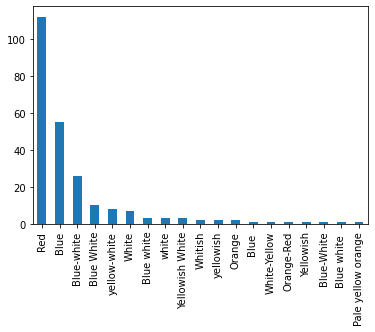

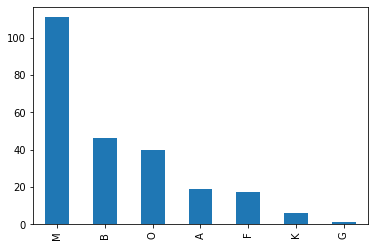

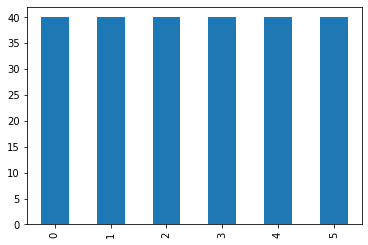

In [109]:
import matplotlib.pyplot as plt

#Plot class frequencies
df['Star color'].value_counts().plot(kind='bar')
plt.show()

df['Spectral Class'].value_counts().plot(kind='bar')
plt.show()

df['Star type'].value_counts().plot(kind='bar')
plt.show()

In [110]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

#Change this to change prediction value
target_value = 'Star type'

feat = df.drop(target_value, axis=1)
targ = df[target_value]

X_train, X_test, Y_train, Y_test = train_test_split(feat, targ, test_size=.2)

In [111]:
#Encode categorical column for xgboost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [112]:
#Train model with gpu_hist tree model
model = XGBClassifier(tree_method="gpu_hist", enable_categorical=True)
model.fit(X_train, Y_train)
model.save_model('model1-{0}.json'.format(target_value))

In [113]:
#Create prediction
expected = Y_test
predicted = model.predict(X_test)
predicted = le.inverse_transform(predicted)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         4

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



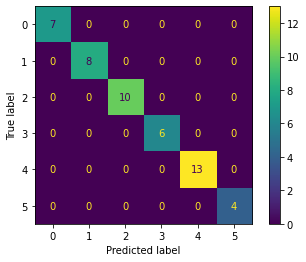

In [114]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Prediction analysis
print(classification_report(expected, predicted, zero_division=1))
disp = ConfusionMatrixDisplay(confusion_matrix(expected, predicted))
disp.plot()